# Assignment 06: Due 10/12

In this assignment we will look at some real data from the CMS experiment at the LHC. The LHC makes a lot of its data publically available here: http://opendata.cern.ch. The information about the data set we will be working with at can be found here: http://opendata.cern.ch/record/545

## Imports 

For this assignemnt you will need the following imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
import seaborn as sns
%matplotlib notebook

# Problem 1

Create a Pandas DataFrame object from the data file *Zee_Run2011A.csv*, located in the *data* dircetroy, and use the *info* function to list the information from the DataFrame.

In [2]:
df = pd.read_csv('data/Zee_Run2011A.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run           18885 non-null  int64  
 1   Event         18885 non-null  int64  
 2   pt1           18885 non-null  float64
 3   eta1          18885 non-null  float64
 4   phi1          18885 non-null  float64
 5   Q1            18885 non-null  int64  
 6   type1         18885 non-null  object 
 7   sigmaEtaEta1  18885 non-null  float64
 8   HoverE1       18885 non-null  float64
 9   isoTrack1     18885 non-null  float64
 10  isoEcal1      18885 non-null  float64
 11  isoHcal1      18885 non-null  float64
 12  pt2           18885 non-null  float64
 13  eta2          18885 non-null  float64
 14  phi2          18885 non-null  float64
 15  Q2            18885 non-null  int64  
 16  type2         18885 non-null  object 
 17  sigmaEtaEta2  18885 non-null  float64
 18  HoverE2       18885 non-nu

# Problem 2

Create a new DataFrame column, which lists the value of the reconstructed invariant mass, $m_{inv}$, from the $Z\rightarrow ee$ decay. The invariant mass is given by

$m_{inv} = \sqrt{2 p_{T1} p_{T2} \left(cosh\left(\eta_1 - \eta_2\right) - cos\left(\phi_1 -\phi_2\right) \right)}$

Make a histogram of the invariant mass.

<IPython.core.display.Javascript object>


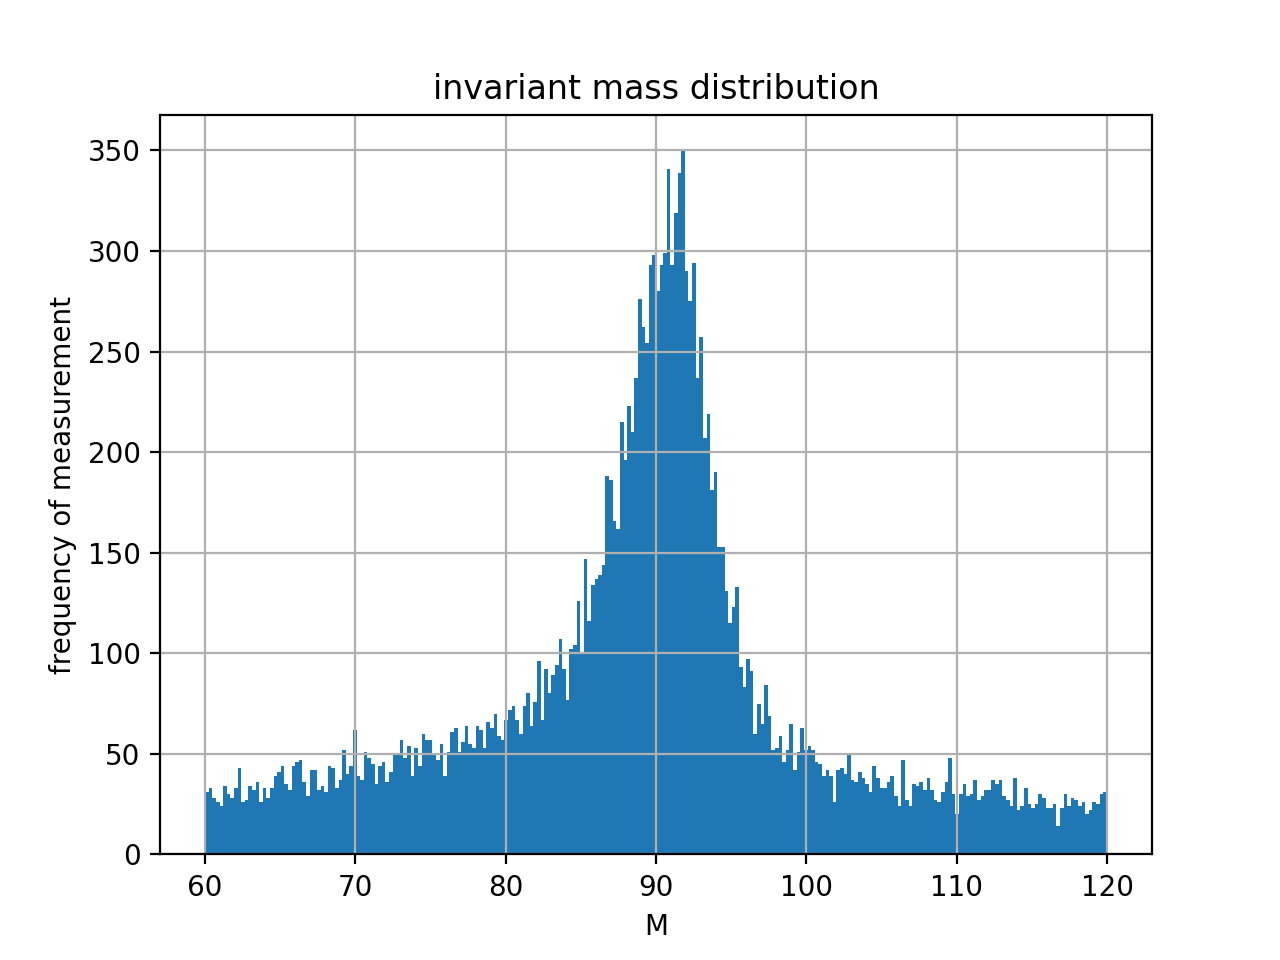

In [18]:
minv = np.sqrt(2*df.pt1*df.pt2*(np.cosh(df.eta1-df.eta2)-np.cos(df.phi1-df.phi2)))
df['M'] = minv

df.hist('M',bins=250);
plt.title('invariant mass distribution')
plt.xlabel('M')
plt.ylabel('frequency of measurement');

# Problem 3

The Relativistic Breit-Wigner distribution is expected to describe the , which is given as

Wikepedia: https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution

$f(E) = \frac{k}{(E^2 -M^2)^2 + M^2\Gamma^2}$, where

 * $\gamma$ = $\sqrt{M^2(M^2+\Gamma^2)}$
 * $k = \frac{2\sqrt{2}M\Gamma\gamma}{\pi\sqrt{M^2+\gamma}}$
 
 Where $E$ is the energy, $M$ is the mass value where the function will peak. 
 Fit the invariant mass distribution with the function:
 
 $aE + b + cf(E)$,
 
 where $a, b, $ and $c$ are fit parameters to be deterimined by your fit that describe a linear background, and $f(E)$ is the Relativistic Breit-Wigner function described above. To do this you should make a function that takes as agruments: $\Gamma, M, a, b, c$. Where $\Gamma$ and $M$ are contained in the Breit-Wigner function ($f(E)$). Our fit will determine the values $\Gamma, M, a, b, c$. The value of $M = m_{inv}$ and should be near where the distribution peaks.   
 
 Fit the distribution and calculate the reduced $\chi^2$. You can use either the *curve_fit* function form Scipy or the MC fitting approach.
 
 What is your best invariant mass value according to your fit? How does this compare to the accepted value of the $Z$ boson mass (you can look it up on Wikipedia)?

<IPython.core.display.Javascript object>


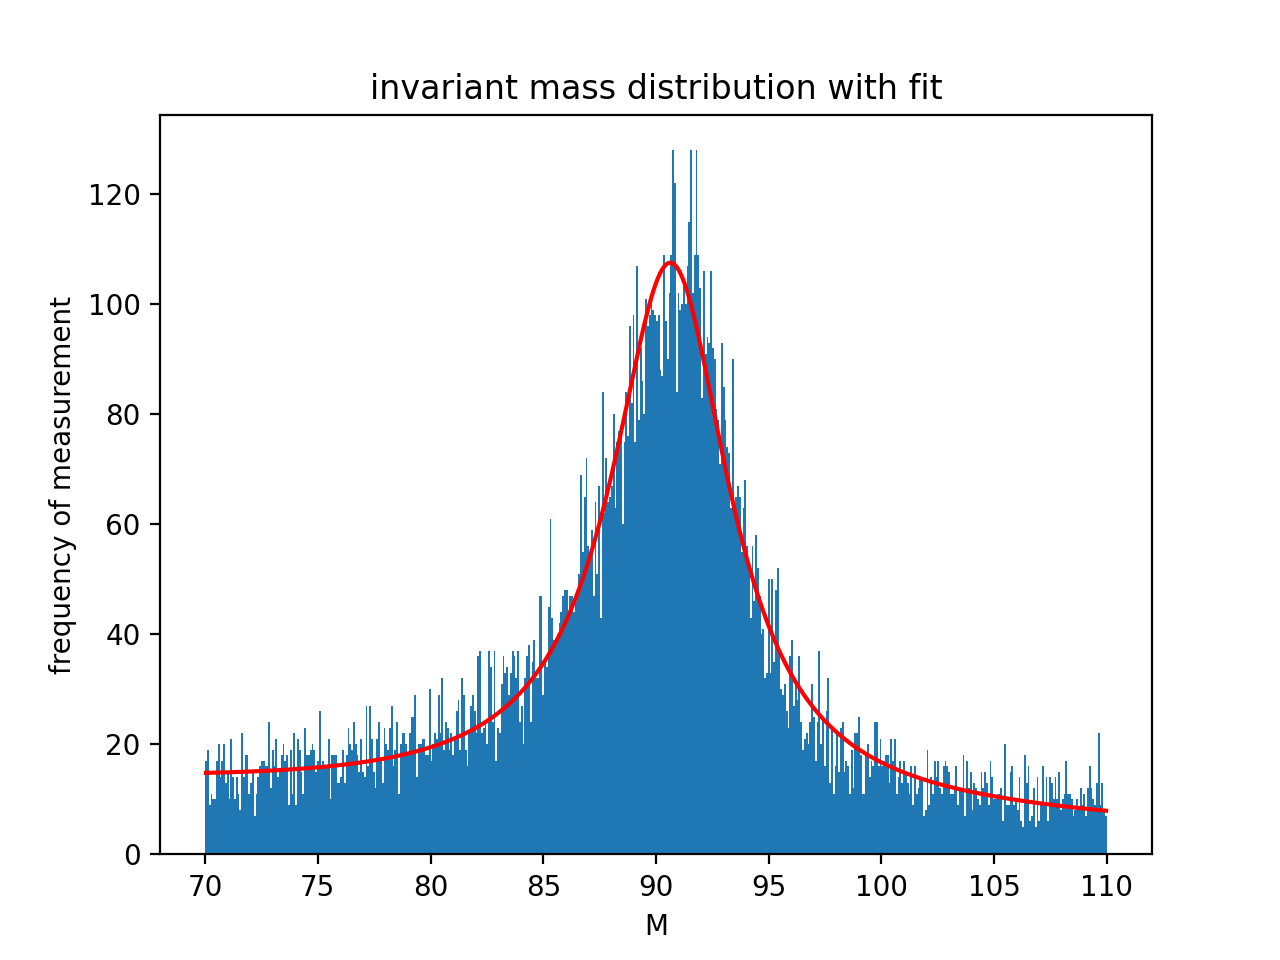

Reduced chisq: 1.2941966324273477

Best invariant mass value according to the fit: 90.64096465148351

Accepted value of thge Z boson: 91.1876
The best invariant mass value according to the fit is a bit smaller than the accepted value of the Z boson mass.


In [20]:
def rel_breitwigner(E,gamma,M,a,b,c):
    littlegamma = np.sqrt(M**2*(M**2 + gamma**2))
    k = 2*np.sqrt(2)*M*gamma*littlegamma/(np.pi*np.sqrt(M**2 + littlegamma))
    return a*E + b + c*(k/((E**2-M**2)**2 + M**2*gamma**2))

xmin=70
xmax=110
bins=500

fig = plt.figure()
histmu = plt.hist(minv,bins=bins,range=(xmin,xmax))
plt.title('invariant mass distribution with fit')
plt.xlabel('M')
plt.ylabel('frequency of measurement')

ymu = histmu[0]
ymu_error = np.sqrt(ymu)
xmu = (histmu[1][0:-1]+histmu[1][1:])/2
for i in range (len(ymu)):
    if ymu_error[i] == 0:
        ymu_error[i] = 1.0
    else:
        ymu_error[i] = ymu_error[i]

intparams = [1,91,-1,250,12500]
bestmu,covmu = curve_fit(rel_breitwigner,xmu,ymu,p0=intparams,sigma=ymu_error)
plt.plot(xmu,rel_breitwigner(xmu,*bestmu),'r-')

chisq = np.sum((ymu - rel_breitwigner(xmu,*bestmu))**2/ymu_error**2)
dof = len(xmu) - len(bestmu) - 1
print('Reduced chisq: {}'.format(chisq/dof))
print('\nBest invariant mass value according to the fit: {}'.format(bestmu[1]))

zbosonmass = 91.1876 #±0.0021 GeV/c2
print('\nAccepted value of thge Z boson: {}\nThe best invariant mass value according to the fit'
      ' is a bit smaller than the accepted value of the Z boson mass.'.format(zbosonmass))

# Problem 4

On the same graph, make histograms of the $\eta_1$ and $\eta_2$ distributions. Be sure to include a legend so the two distributions can be distinquised.

<IPython.core.display.Javascript object>


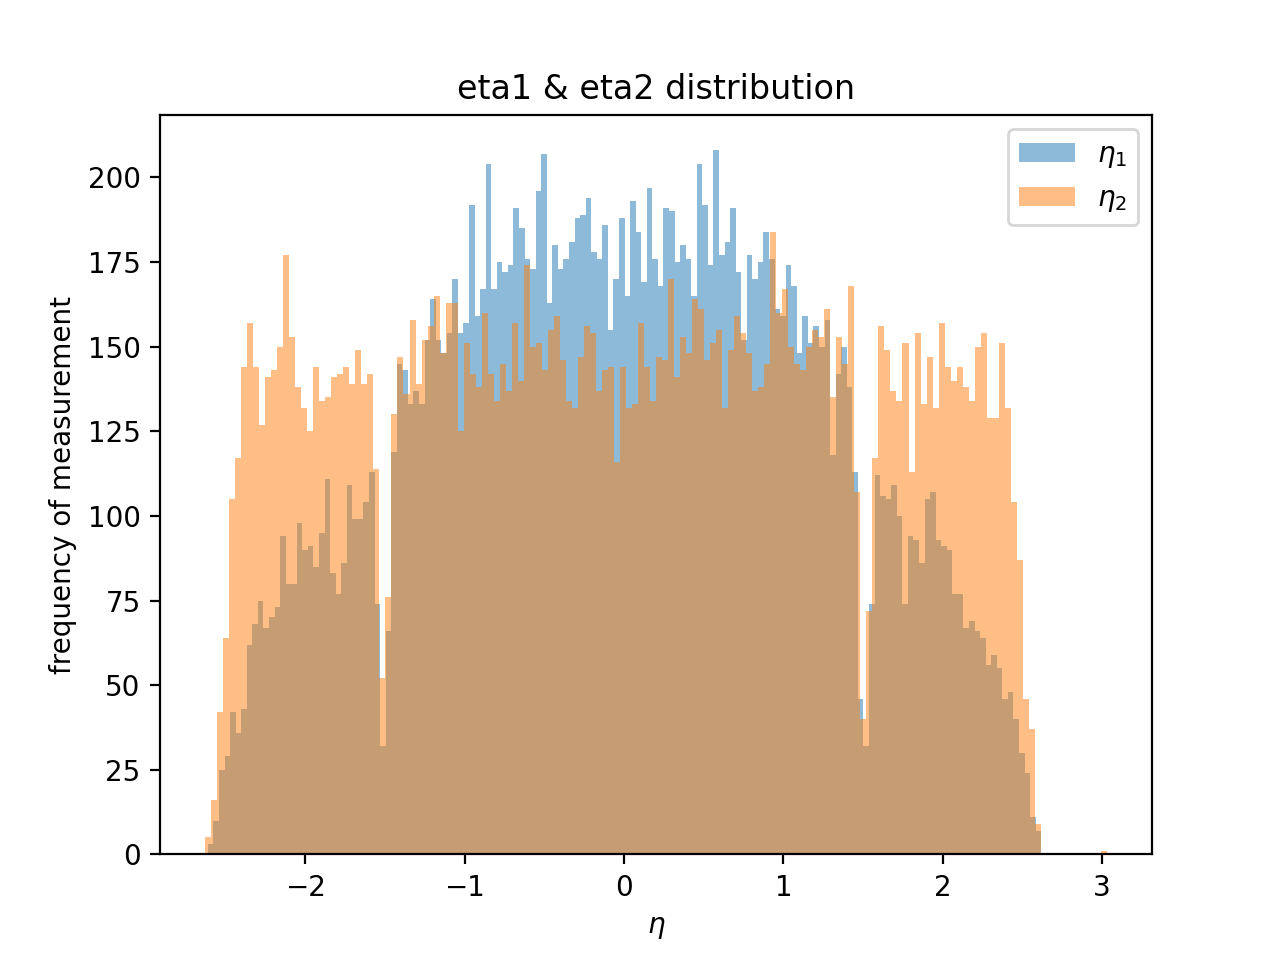

In [21]:
fig = plt.figure()
plt.hist(df.eta1,bins=150,alpha=0.5,label='$\eta_1$')
plt.hist(df.eta2,bins=150,alpha=0.5,label='$\eta_2$')
plt.xlabel('$\eta$')
plt.ylabel('frequency of measurement')
plt.title('eta1 & eta2 distribution')
plt.legend();

# Problem 5

From the distribution above, we clearly see two distinct distributions in the histogram. We can explain this due to the decay being detected in two different detectors, the electromagnetic barrel calorimeter (EB) and the endcap electromagnetic calorimeter (EE). This distinction is made in the column labeled *type1* and *type2*, which tells us which detector particle 1 and particle 2 are detected in. 

Create two DataFrames *barrel* and *endcap*, where *barrel* keeps all of the information in the original DataFrame where both particles were detected in the EB, and *endcap* keeps all of the information in the original DataFrame where both particles were detected in the EE.

Make two sub plots where in sub plot one you histogram the $\eta1$ distribution for the particles in the EB and EE. Then in sub plot two histogram the $\eta2$ distribution for particles detected in the EE and EB. Be sure to include a legend that distiquishes EB from EE events.

Based on the information above, does our assumption that the $\eta$ distribution looks the way it does is because of the two different detectors make sense? Based on your histograms, what is the rough $\eta$ ranges covered by the EB and EE detectors?

<IPython.core.display.Javascript object>


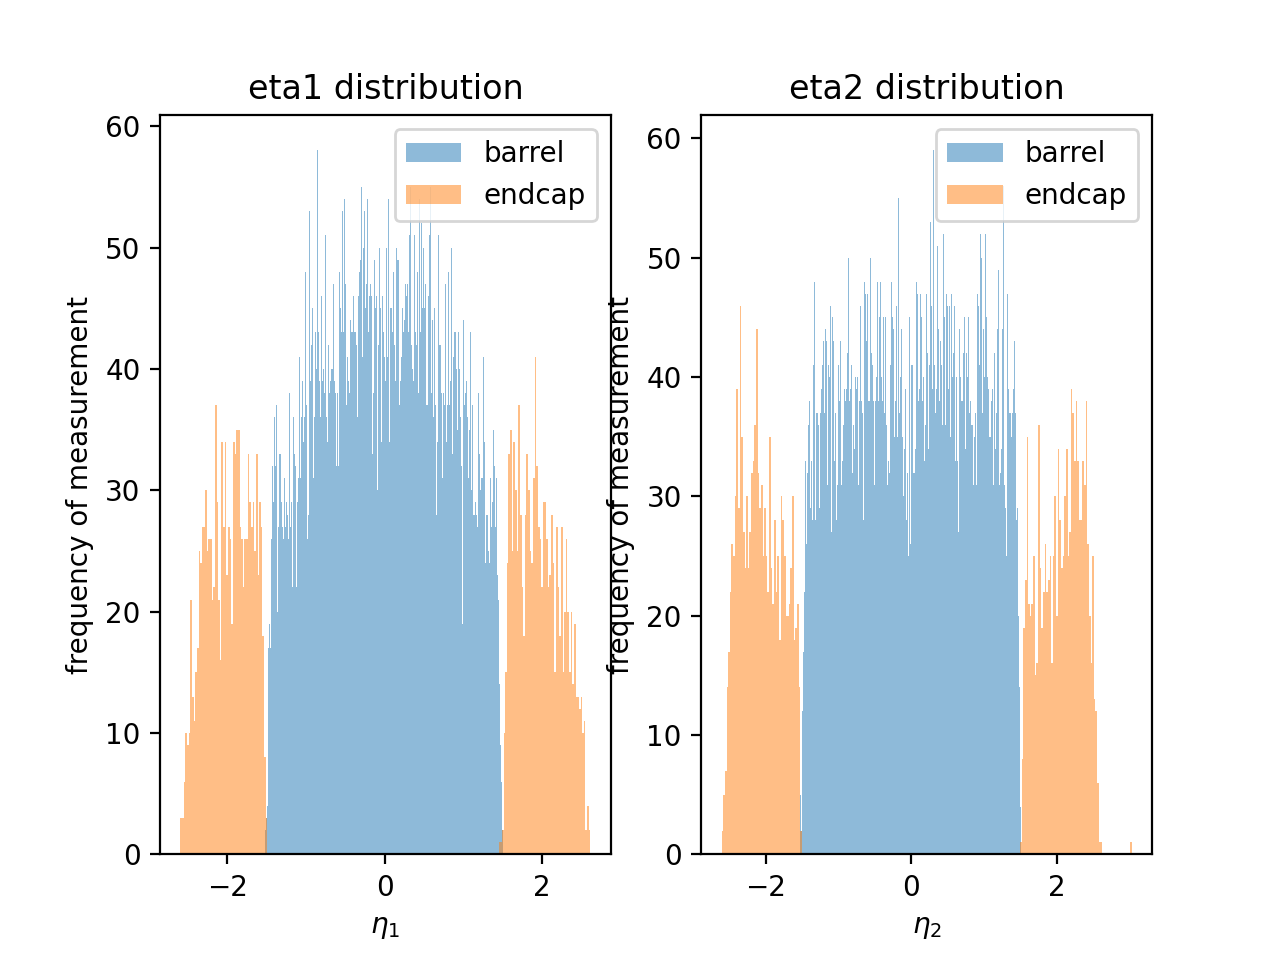

The assumption that the eta distribution looks different due to the detector is was observed in is exemplified by this histogram. Since the barrel detector is positioned surrounding the center of the beams collision, we would expect the resulting decay to be observed when the angle between the transverse momentum and positive axis of the beam to be at and around 90 degrees. This explains why the barrels eta range is from approximately -1.5 to +1.5. Again this is because of the central location of the barrel detector. Similarly because the endcap detectors are located relatively further from the collision, we expect the decay angle to be closer to the positive and negative axis of the beam (closer to 0 degrees). This is why the endcap detector has eta ranging from approximately -2.6 to -1.5 and from +1.5 to +2.6.


In [27]:
barrel = df[(df['type1']=='EB') & (df['type2']=='EB')]
endcap = df[(df['type1']=='EE') & (df['type2']=='EE')]

fig, axes = plt.subplots(1,2)
axes[0].hist(barrel.eta1,bins=250,alpha=0.5,label='barrel')
axes[0].hist(endcap.eta1,bins=250,alpha=0.5,label='endcap')
axes[1].hist(barrel.eta2,bins=250,alpha=0.5,label='barrel')
axes[1].hist(endcap.eta2,bins=250,alpha=0.5,label='endcap')
axes[0].set_title('eta1 distribution')
axes[0].set_xlabel('$\eta_1$')
axes[0].set_ylabel('frequency of measurement')
axes[1].set_title('eta2 distribution')
axes[1].set_xlabel('$\eta_2$')
axes[1].set_ylabel('frequency of measurement')
axes[0].legend()
axes[1].legend();

print('The assumption that the eta distribution looks different due to the detector is was observed in is exemplified by this histogram. '
      'Since the barrel detector is positioned surrounding the center of the beams collision, we would expect the resulting decay to be observed '
      'when the angle between the transverse momentum and positive axis of the beam to be at and around 90 degrees. This explains why the barrels '
      'eta range is from approximately -1.5 to +1.5. Again this is because of the central location of the barrel detector. Similarly because the endcap detectors '
      'are located relatively further from the collision, we expect the decay angle to be closer to the positive and negative axis of the beam (closer to 0 degrees). '
       'This is why the endcap detector has eta ranging from approximately -2.6 to -1.5 and from +1.5 to +2.6.')




# Problem 6

With particles being detected in two different detectors, the resolution of the detectors could differ. This could reslt in measureing the boson mass better in one detector than the other.

Using your *barrel* and *endcap* DataFrames from above, on the same graph make a histogram of the invariant mass measured in the barrel and endcap detectors.  

Use the *std* function to get the standard deviation of the two invariant mass distributions. The standard deviation is reflective of how narrow our mass peak is. Which detector gives the better resolution and hence the narrower invariant mass distribution? Does your histogram support the same conclusion?

<IPython.core.display.Javascript object>


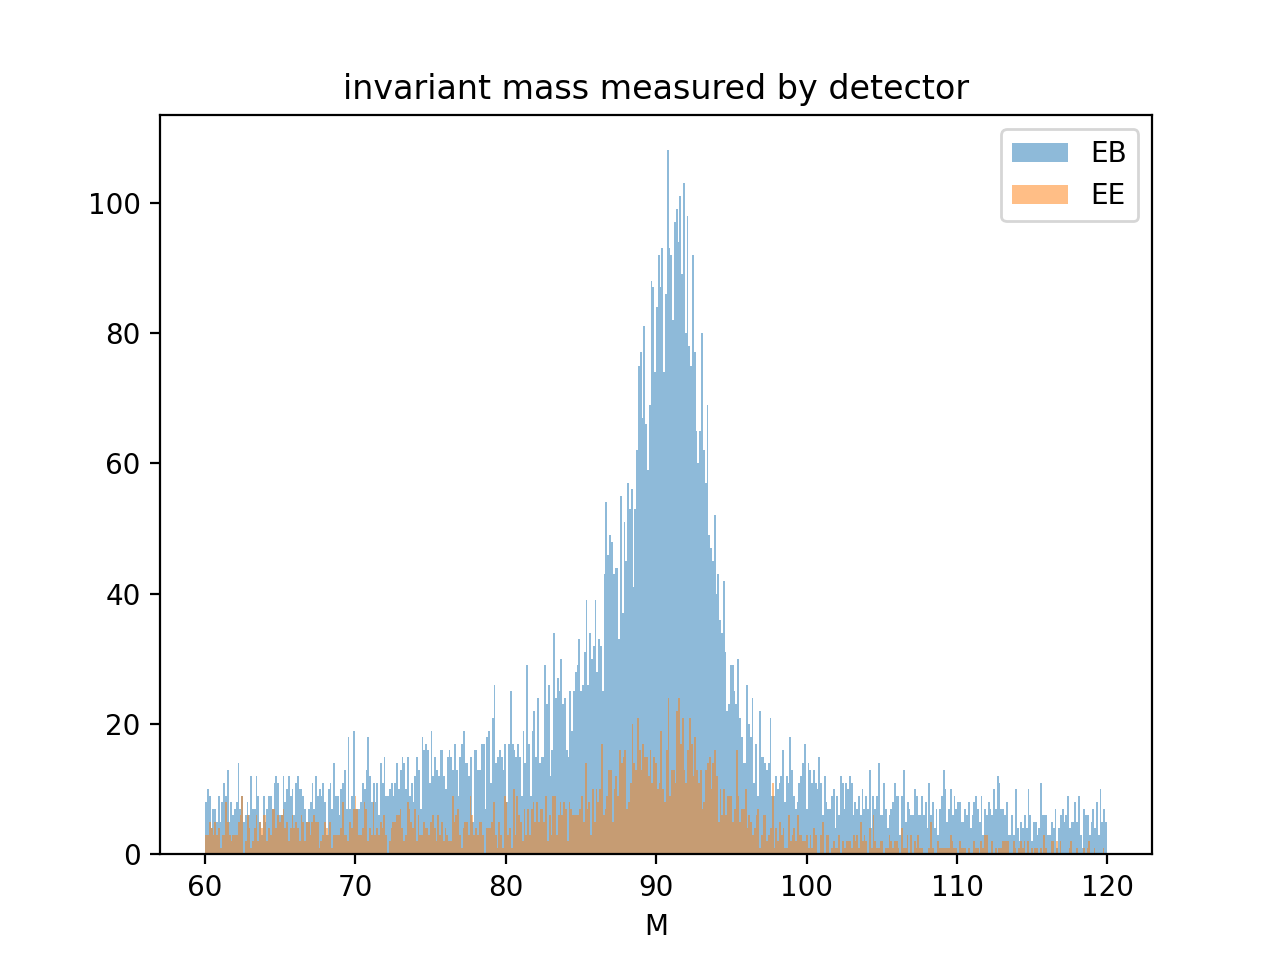

Barrel Standard Deviation: 11.489115344078318 
Endcap Standard Deviation: 12.229202324653295

Its noticeable that the resolution of the invariant mass distribution is much better when detected in the barrel. We can see why this is from the difference in calculated standard deviations of the invariant mass distributions between the two detectors, as well as from the histogram because of how much more frequent the barrel detects an accurate measurement of the invariant mass. 


In [26]:
fig = plt.figure()
plt.hist(barrel.M,bins=500,alpha=0.5,label='EB')
plt.hist(endcap.M,bins=500,alpha=0.5,label='EE')
plt.xlabel('M')
plt.title('invariant mass measured by detector')
plt.legend()
print('Barrel Standard Deviation: {} \nEndcap Standard Deviation: {}'.format(barrel['M'].std(),endcap['M'].std()))
print('\nIts noticeable that the resolution of the invariant mass distribution is much better when detected in the barrel. '
      'We can see why this is from the difference in calculated standard deviations of the invariant mass distributions between the two detectors, ' 
      'as well as from the histogram because of how much more frequent the barrel detects an accurate measurement of the invariant mass. ')

# Problem 7
From your DataFrame (from Problem 2), drop all columns except for pt1, eta1, phi1, pt2, eta2, phi2, and M. 
Using this DataFrame, use the Pandas *corr* function to produce a correlataion table. What quantites have the strongest correlation (that is not 1)?

<IPython.core.display.Javascript object>


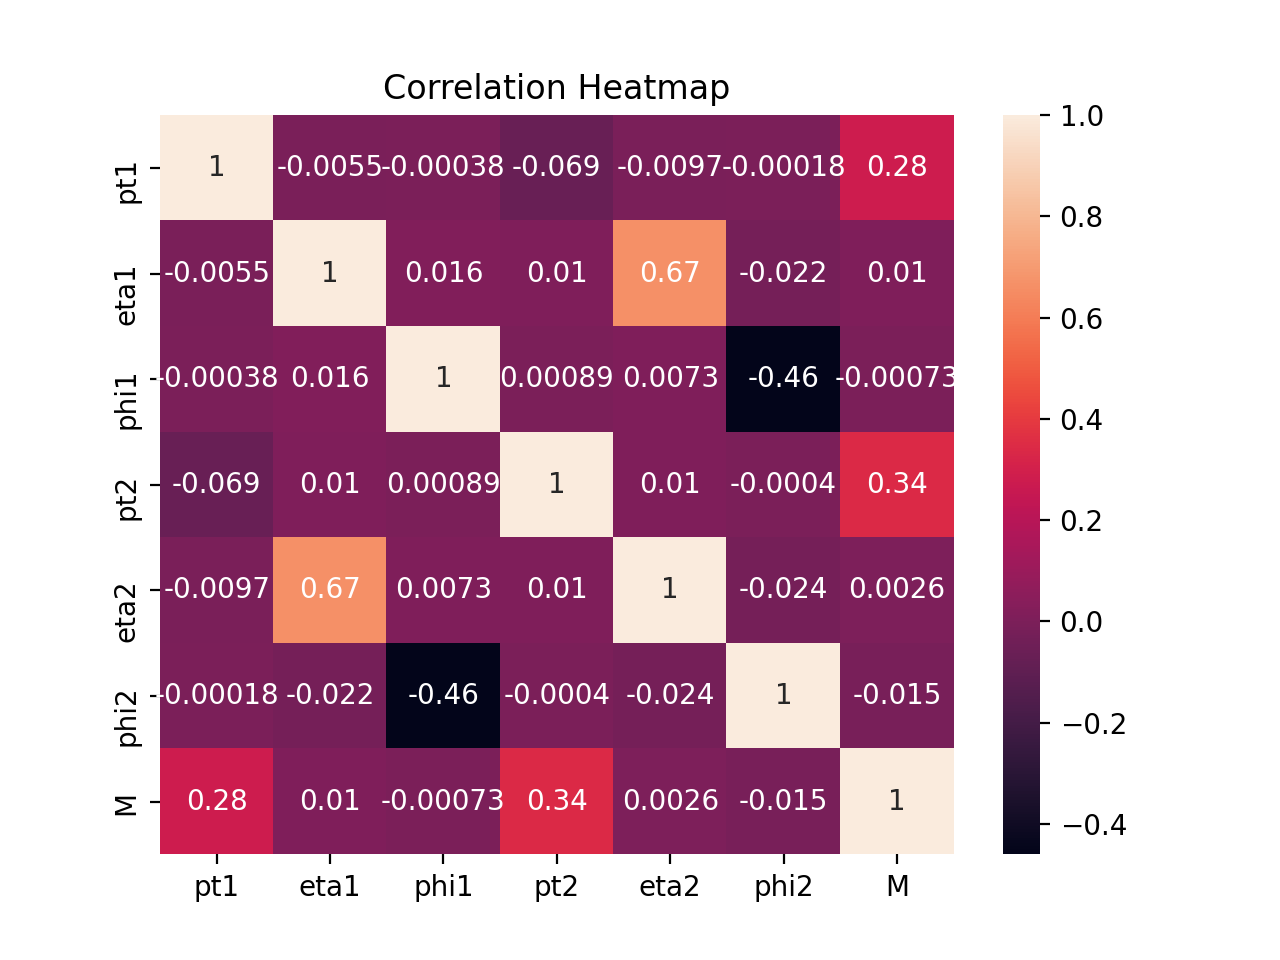

According to the correlation table and its corresponding heatmap, the pseudorapidity of both Particles have a relatively strong positive correlation. The invariant mass and transverse momentum of the particles are positively correlated as well.


,pt1,eta1,phi1,pt2,eta2,phi2,M
pt1,1.000000,-0.005495,-0.000376,-0.068503,-0.009661,-0.000184,0.279797
eta1,-0.005495,1.000000,0.015935,0.009975,0.665429,-0.022004,0.010426
phi1,-0.000376,0.015935,1.000000,0.000893,0.007323,-0.460515,-0.000727
pt2,-0.068503,0.009975,0.000893,1.000000,0.010027,-0.000399,0.342749
eta2,-0.009661,0.665429,0.007323,0.010027,1.000000,-0.023955,0.002616
phi2,-0.000184,-0.022004,-0.460515,-0.000399,-0.023955,1.000000,-0.015139
M,0.279797,0.010426,-0.000727,0.342749,0.002616,-0.015139,1.000000


In [28]:
df2 = df[['pt1','eta1','phi1','pt2','eta2','phi2','M']]

fig = plt.figure()
sns.heatmap(df2.corr(),annot=True)
plt.title('Correlation Heatmap')

print('According to the correlation table and its corresponding heatmap, the pseudorapidity of both Particles have a relatively strong'
      ' positive correlation. The invariant mass and transverse momentum of the particles are positively correlated as well.')
df2.corr()